In [1]:
import numpy as np
import lbg_forecast.nz as nz
import lbg_forecast.population_model as pop
import lbg_forecast.nz as nz
import matplotlib.pyplot as plt
import lbg_forecast.sfh as sfh
import lbg_forecast.priors_gp_dust as gpdp
import scipy as sc

In [ ]:
nruns=1
run='test'
extra=True
spsp = []
selected_spsp = []
photometry = []
nzs = []
trans_cut = []
trans = []
for i in range(nruns):
    spsp.append(np.load("sps_parameter_samples/sps_"+run+"_"+str(i)+".npy"))
    selected_spsp.append(np.load("sps_parameter_samples/selected_sps_"+run+"_"+str(i)+".npy", allow_pickle=True))
    photometry.append(np.load("photo_samples/photo_"+run+"_"+str(i)+".npy"))
    nzs.append(np.load("nz_samples/nz_"+run+"_"+str(i)+".npy", allow_pickle=True))
    trans_cut.append(np.load("nz_samples/trans_cut_"+run+"_"+str(i)+".npy"))
    trans.append(np.load("nz_samples/trans_"+run+"_"+str(i)+".npy"))

spsp = np.vstack(spsp)
selected_spsp = np.vstack(selected_spsp)
photometry = np.vstack(photometry)
nzs = np.vstack(nzs)
trans_cut = np.vstack(trans_cut)
trans = np.vstack(trans)
print(spsp.shape, selected_spsp.shape, photometry.shape, nzs.shape, trans_cut.shape, trans.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'sps_parameter_samples/sps_test_0.npy'

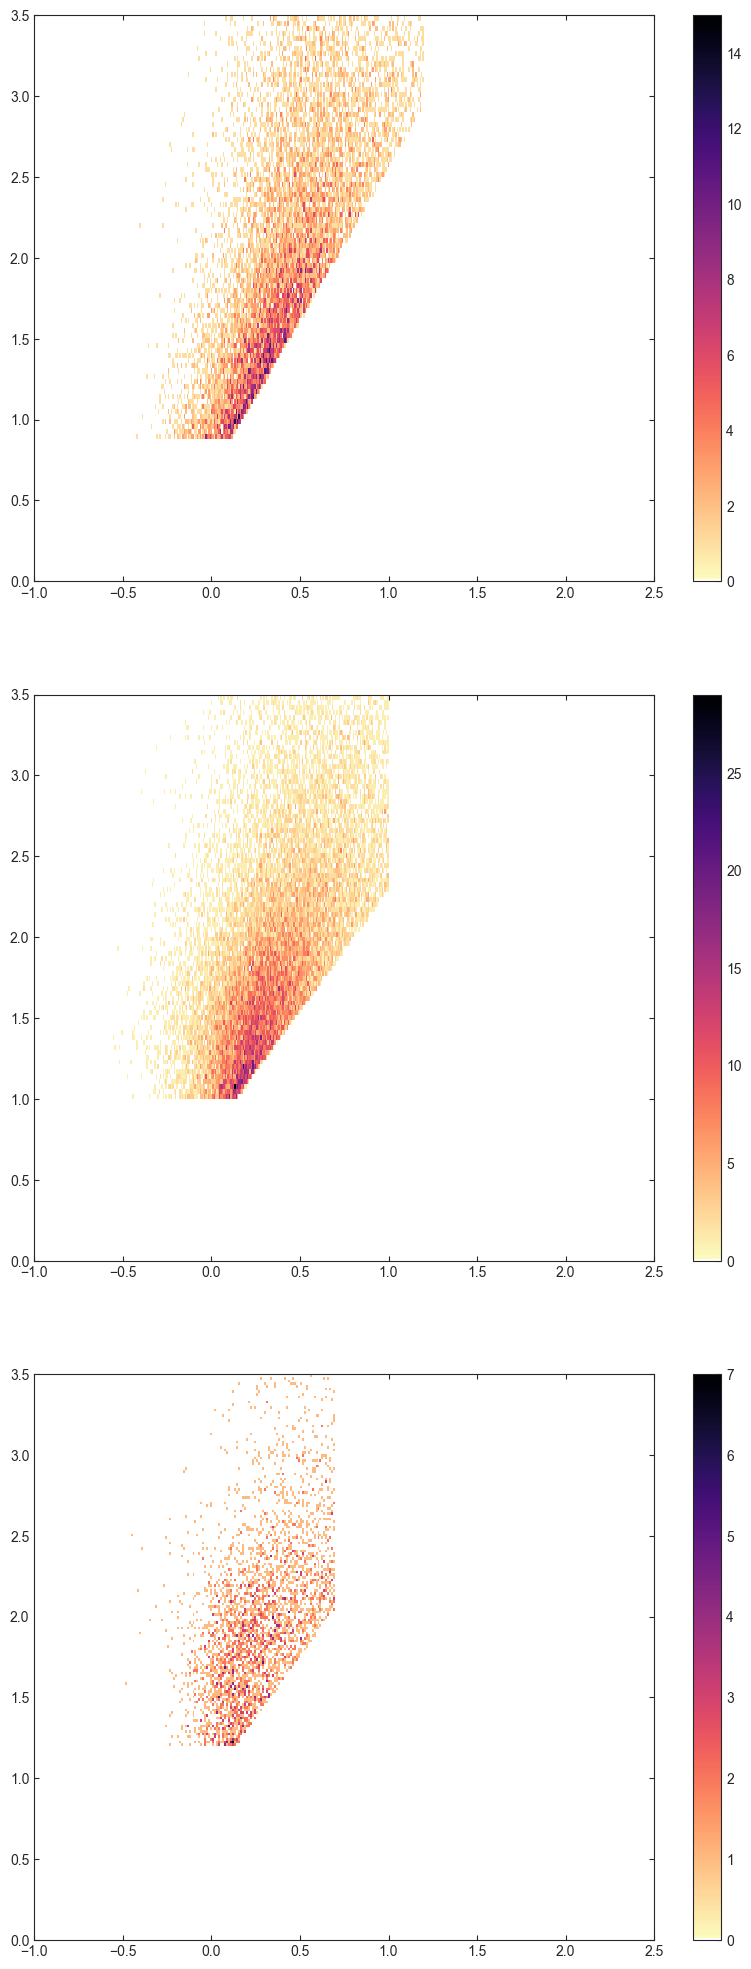

In [ ]:
run_no=0
if(extra):

    from matplotlib.colors import LinearSegmentedColormap
    magma = plt.get_cmap('magma_r')
    rgba = magma(np.linspace(0, 1, 256))
    rgba[0] = [1, 1, 1, 1]
    magma_whitebackground = LinearSegmentedColormap.from_list('magma_white', rgba)

    f, ax = plt.subplots(3, 1, figsize=(10, 25))
    lbg_colours = np.load("nz_samples/c_"+run+"_"+str(run_no)+".npy", allow_pickle=True)
    for i in range(3):
        cs = []
        for real in lbg_colours[:, i]:
            cs.append(np.squeeze(real))

        dropout_colours = np.vstack(cs)
        histogram = ax[i].hist2d(dropout_colours[:, i+1], dropout_colours[:, i], alpha=1.0, bins=(200,400), cmap=magma_whitebackground, density=False)
        f.colorbar(histogram[-1], orientation='vertical')
        ax[i].set_ylim(0, 3.5)
        ax[i].set_xlim(-1, 2.5)


In [4]:
percentile=84
mean = np.mean(trans_cut, axis=0)
std =  3*np.std(trans_cut, axis=0)
errl = np.percentile(trans_cut, 100-percentile, axis=0)
errh = np.percentile(trans_cut, percentile, axis=0)

print("u-dropout number density (cut): ",mean[0],"-",(mean-errl)[0],"+",(errh-mean)[0],"deg-2")
print("g-dropout number density (cut): ",mean[1],"-",(mean-errl)[1],"+",(errh-mean)[1],"deg-2")
print("r-dropout number density (cut): ",mean[2],"-",(mean-errl)[2],"+",(errh-mean)[2],"deg-2")



mean = np.mean(trans, axis=0)
std =  3*np.std(trans, axis=0)
errl = np.percentile(trans, 100-percentile, axis=0)
errh = np.percentile(trans, percentile, axis=0)

print("u-dropout number density: ",mean[0],"-",(mean-errl)[0],"+",(errh-mean)[0],"deg-2")
print("g-dropout number density: ",mean[1],"-",(mean-errl)[1],"+",(errh-mean)[1],"deg-2")
print("r-dropout number density: ",mean[2],"-",(mean-errl)[2],"+",(errh-mean)[2],"deg-2")

u-dropout number density (cut):  7989.464246052108 - 262.8467612721197 + 218.658414388261 deg-2
g-dropout number density (cut):  13692.666940263487 - 824.5145512874151 + 89.79154039963578 deg-2
r-dropout number density (cut):  2167.5479157047816 - 286.8463829447089 + 221.99809827134732 deg-2
u-dropout number density:  31777.041588302705 - 2887.2220323135152 + 801.0318043747029 deg-2
g-dropout number density:  54571.456332632646 - 4585.568138107548 + -496.8457161079932 deg-2
r-dropout number density:  8689.122812053649 - 1571.9218273446832 + 416.40831250740484 deg-2


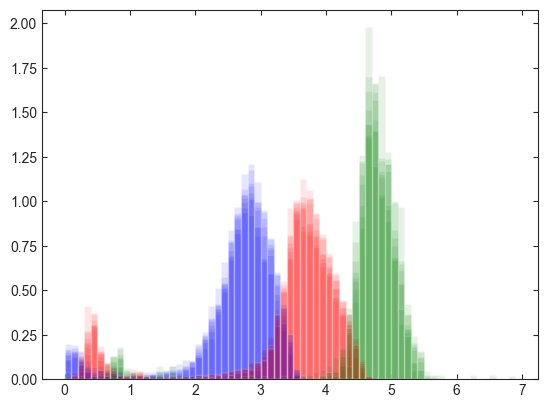

In [6]:
bins = nz.default_nz_bins()

for n in range(nzs.shape[0]):
    hist = plt.hist(nzs[n][0], density=True, bins=bins, alpha = 0.1, color='blue')
    hist = plt.hist(nzs[n][1], density=True, bins=bins, alpha = 0.1, color='red')
    hist = plt.hist(nzs[n][2], density=True, bins=bins, alpha = 0.1, color='green')

In [26]:
def get_mass_less_8(seleced_sps, real):

    umasses = np.log10(np.squeeze(seleced_sps[real, 0])[:, -1])
    gmasses = np.log10(np.squeeze(seleced_sps[real, 1])[:, -1])
    rmasses = np.log10(np.squeeze(seleced_sps[real, 2])[:, -1])

    umasses8 = umasses[np.where(umasses < 8)[0]]
    gmasses8 = gmasses[np.where(gmasses < 8)[0]]
    rmasses8 = rmasses[np.where(rmasses < 8)[0]]

    upless8 = (len(umasses8)/len(umasses))*100
    gpless8 = (len(gmasses8)/len(gmasses))*100
    rpless8 = (len(rmasses8)/len(rmasses))*100

    return upless8, gpless8, rpless8

per_mass = np.zeros(3)
for indx in range(nzs.shape[0]):
    per_mass+=np.array(get_mass_less_8(selected_spsp, indx))

per_mass/nzs.shape[0]

array([3.29169569, 3.42312979, 0.74390858])

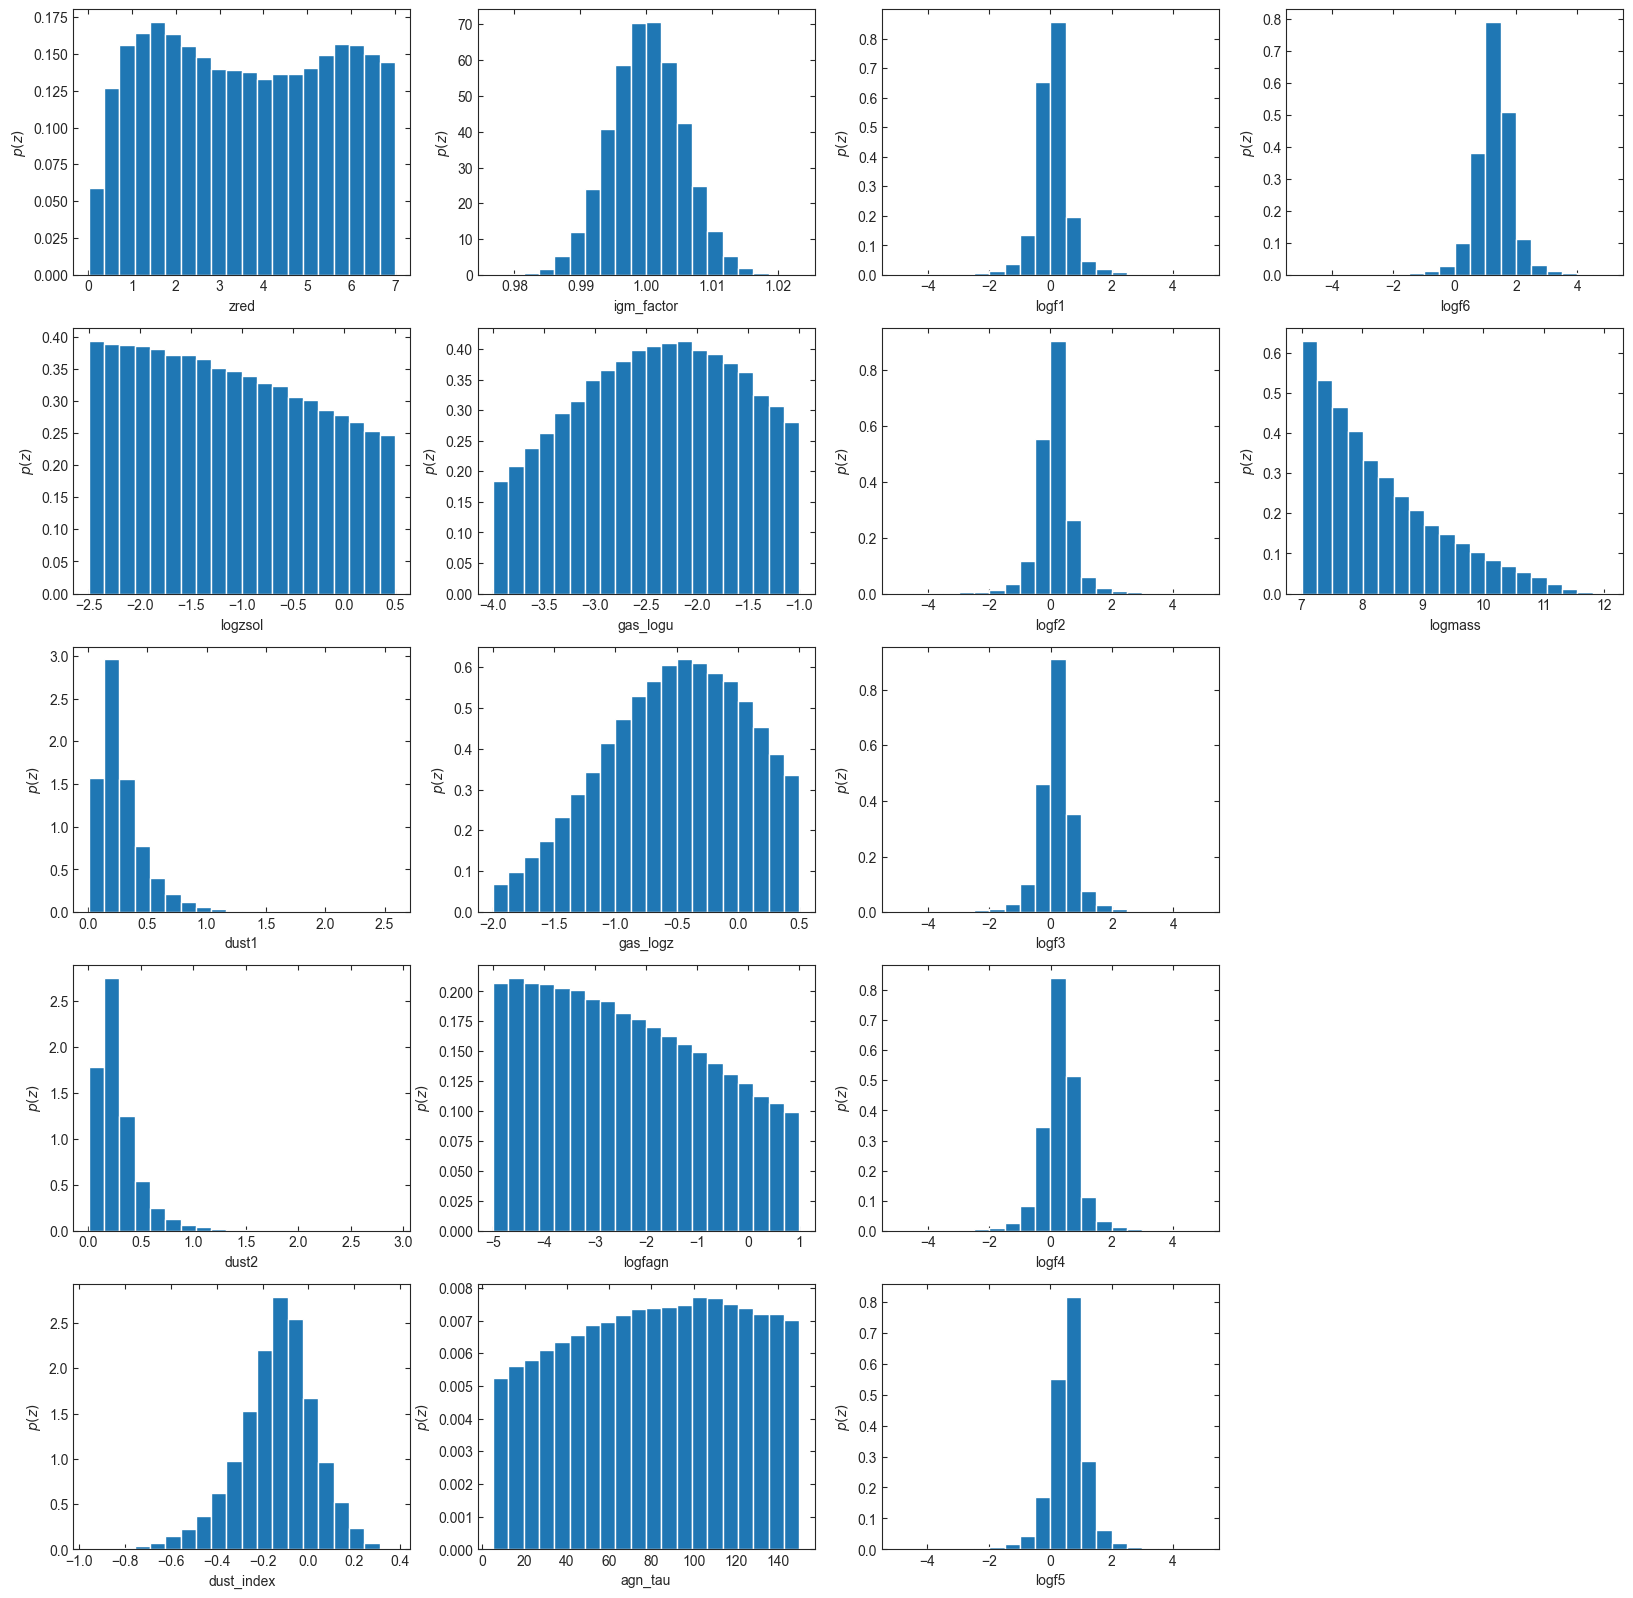

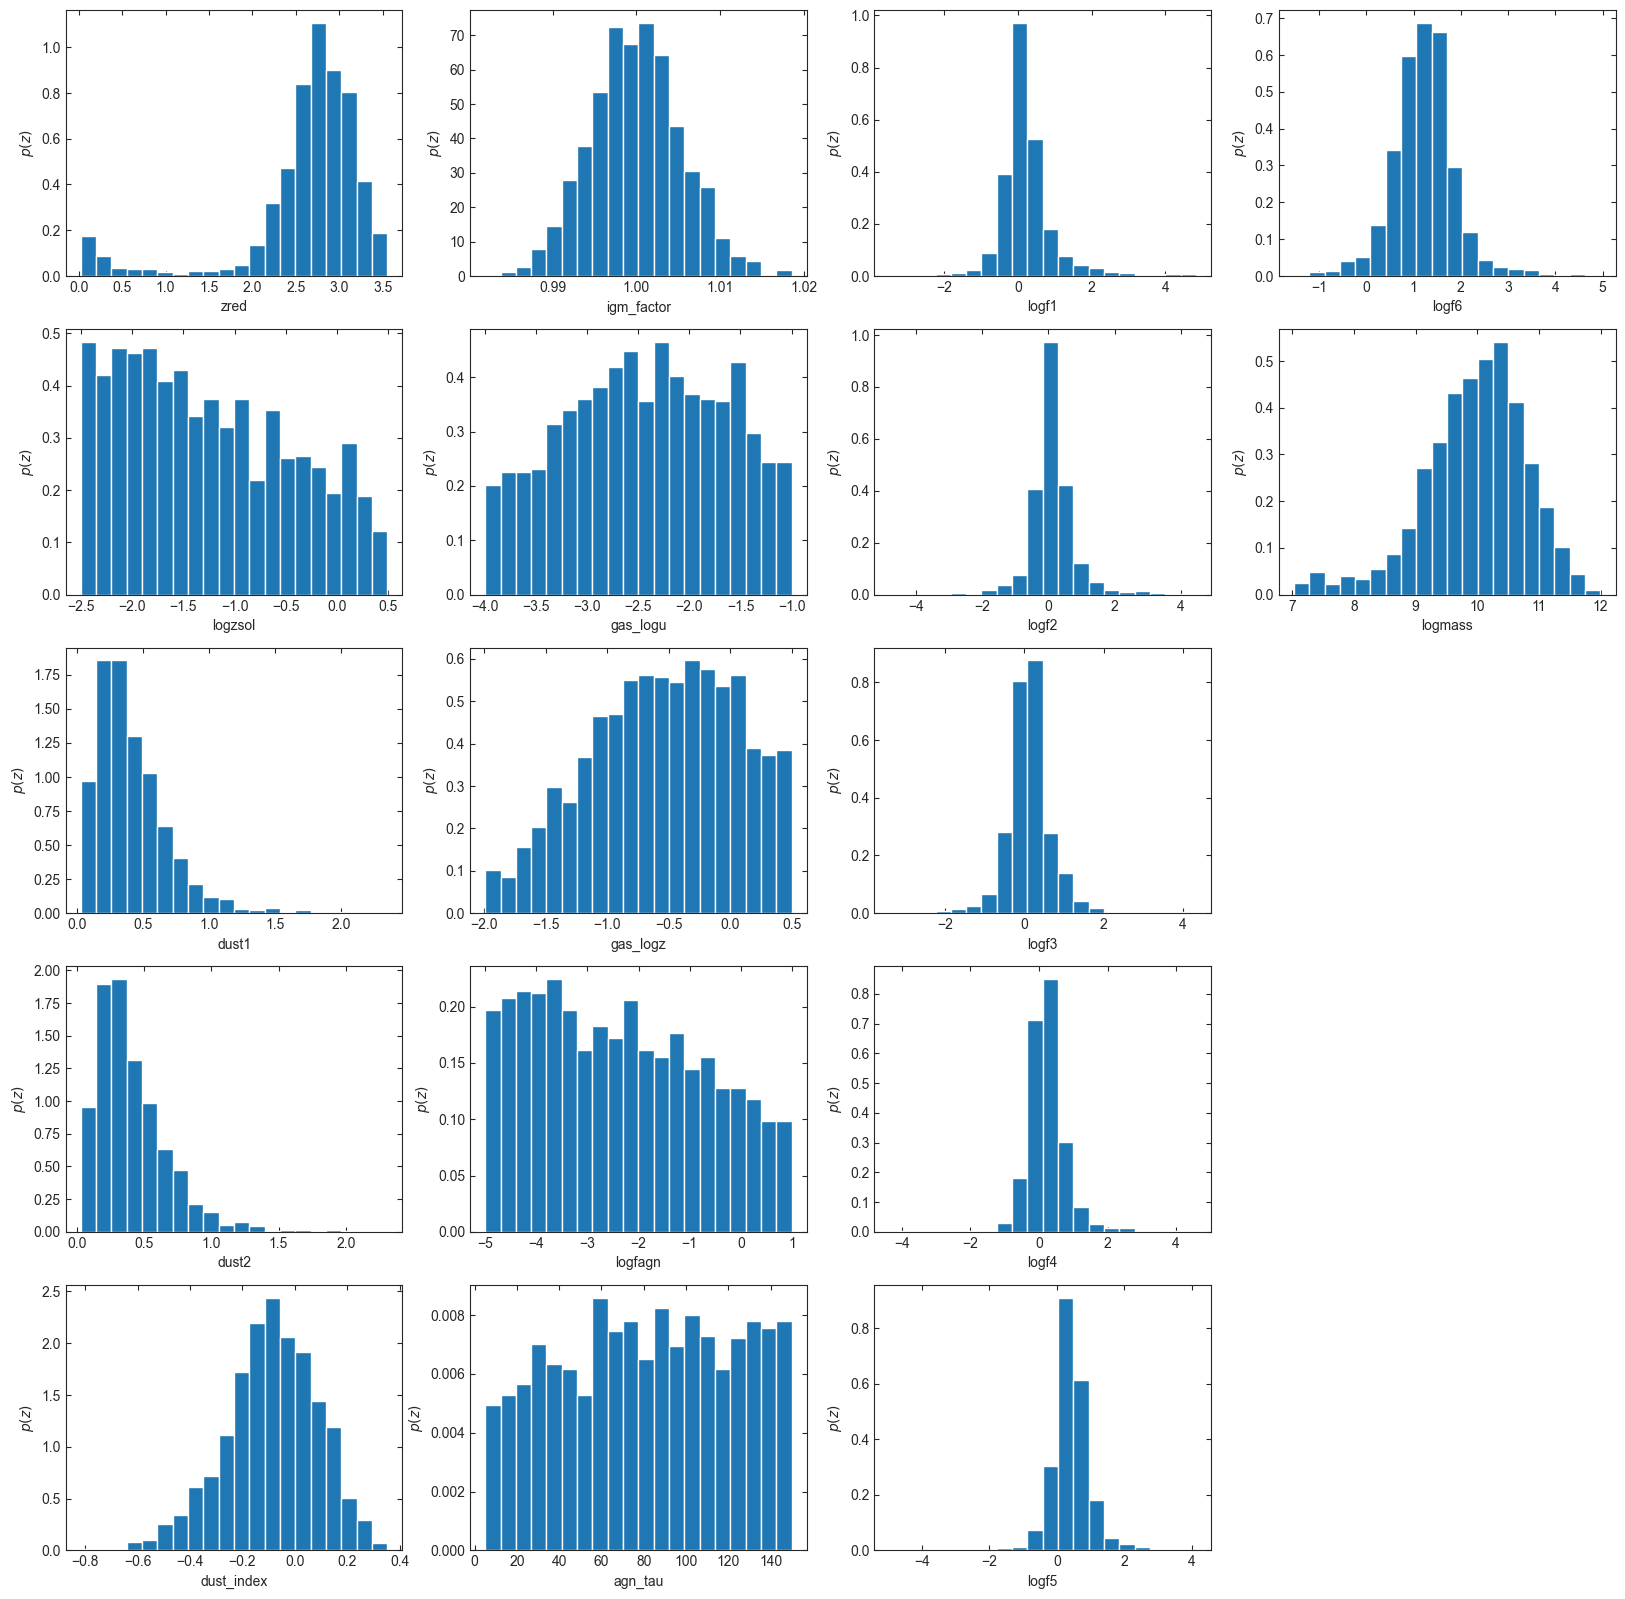

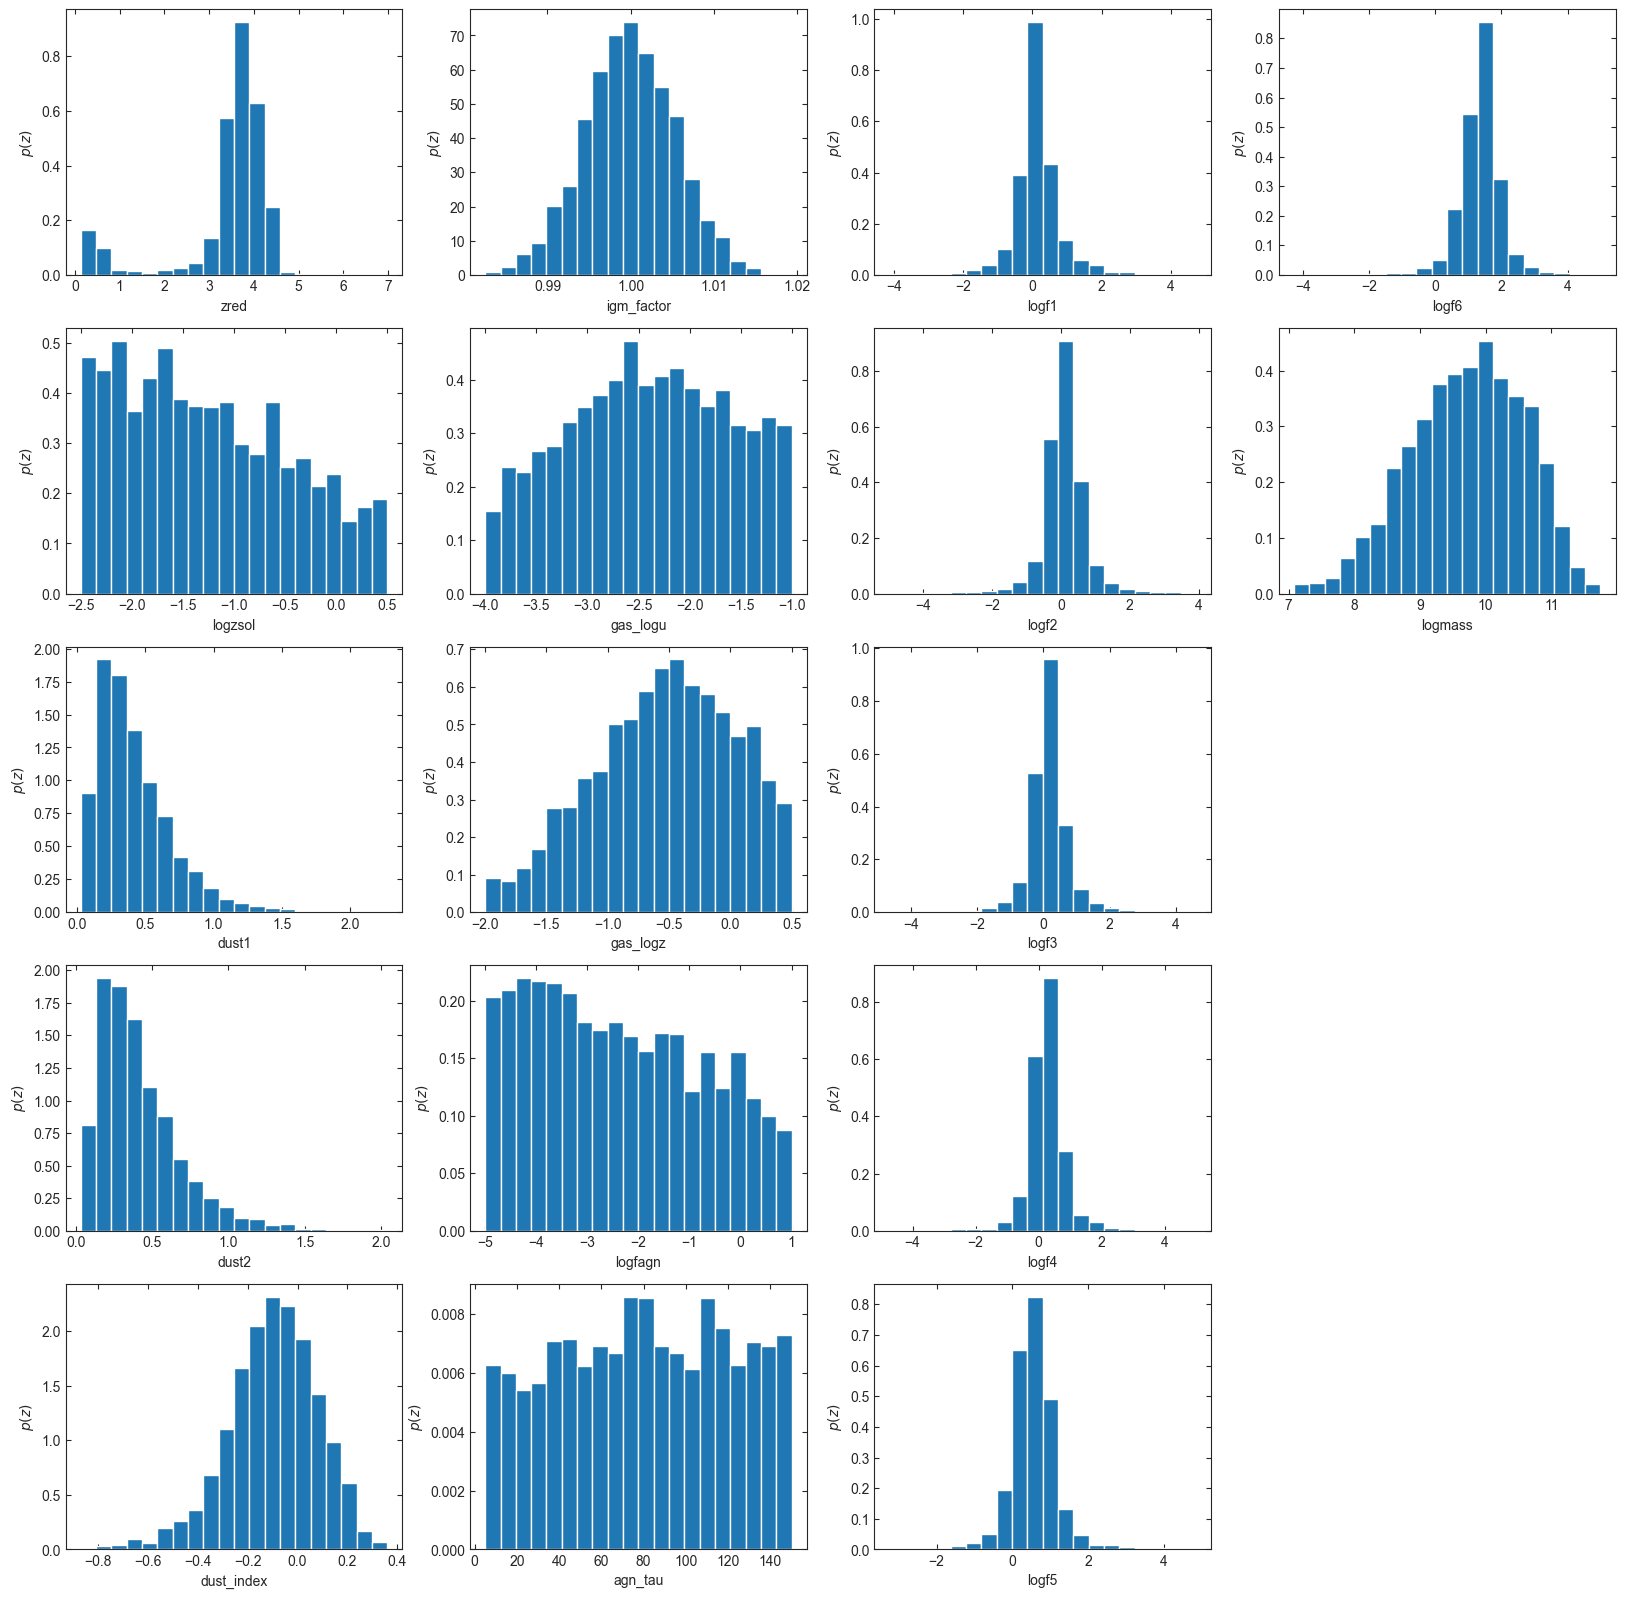

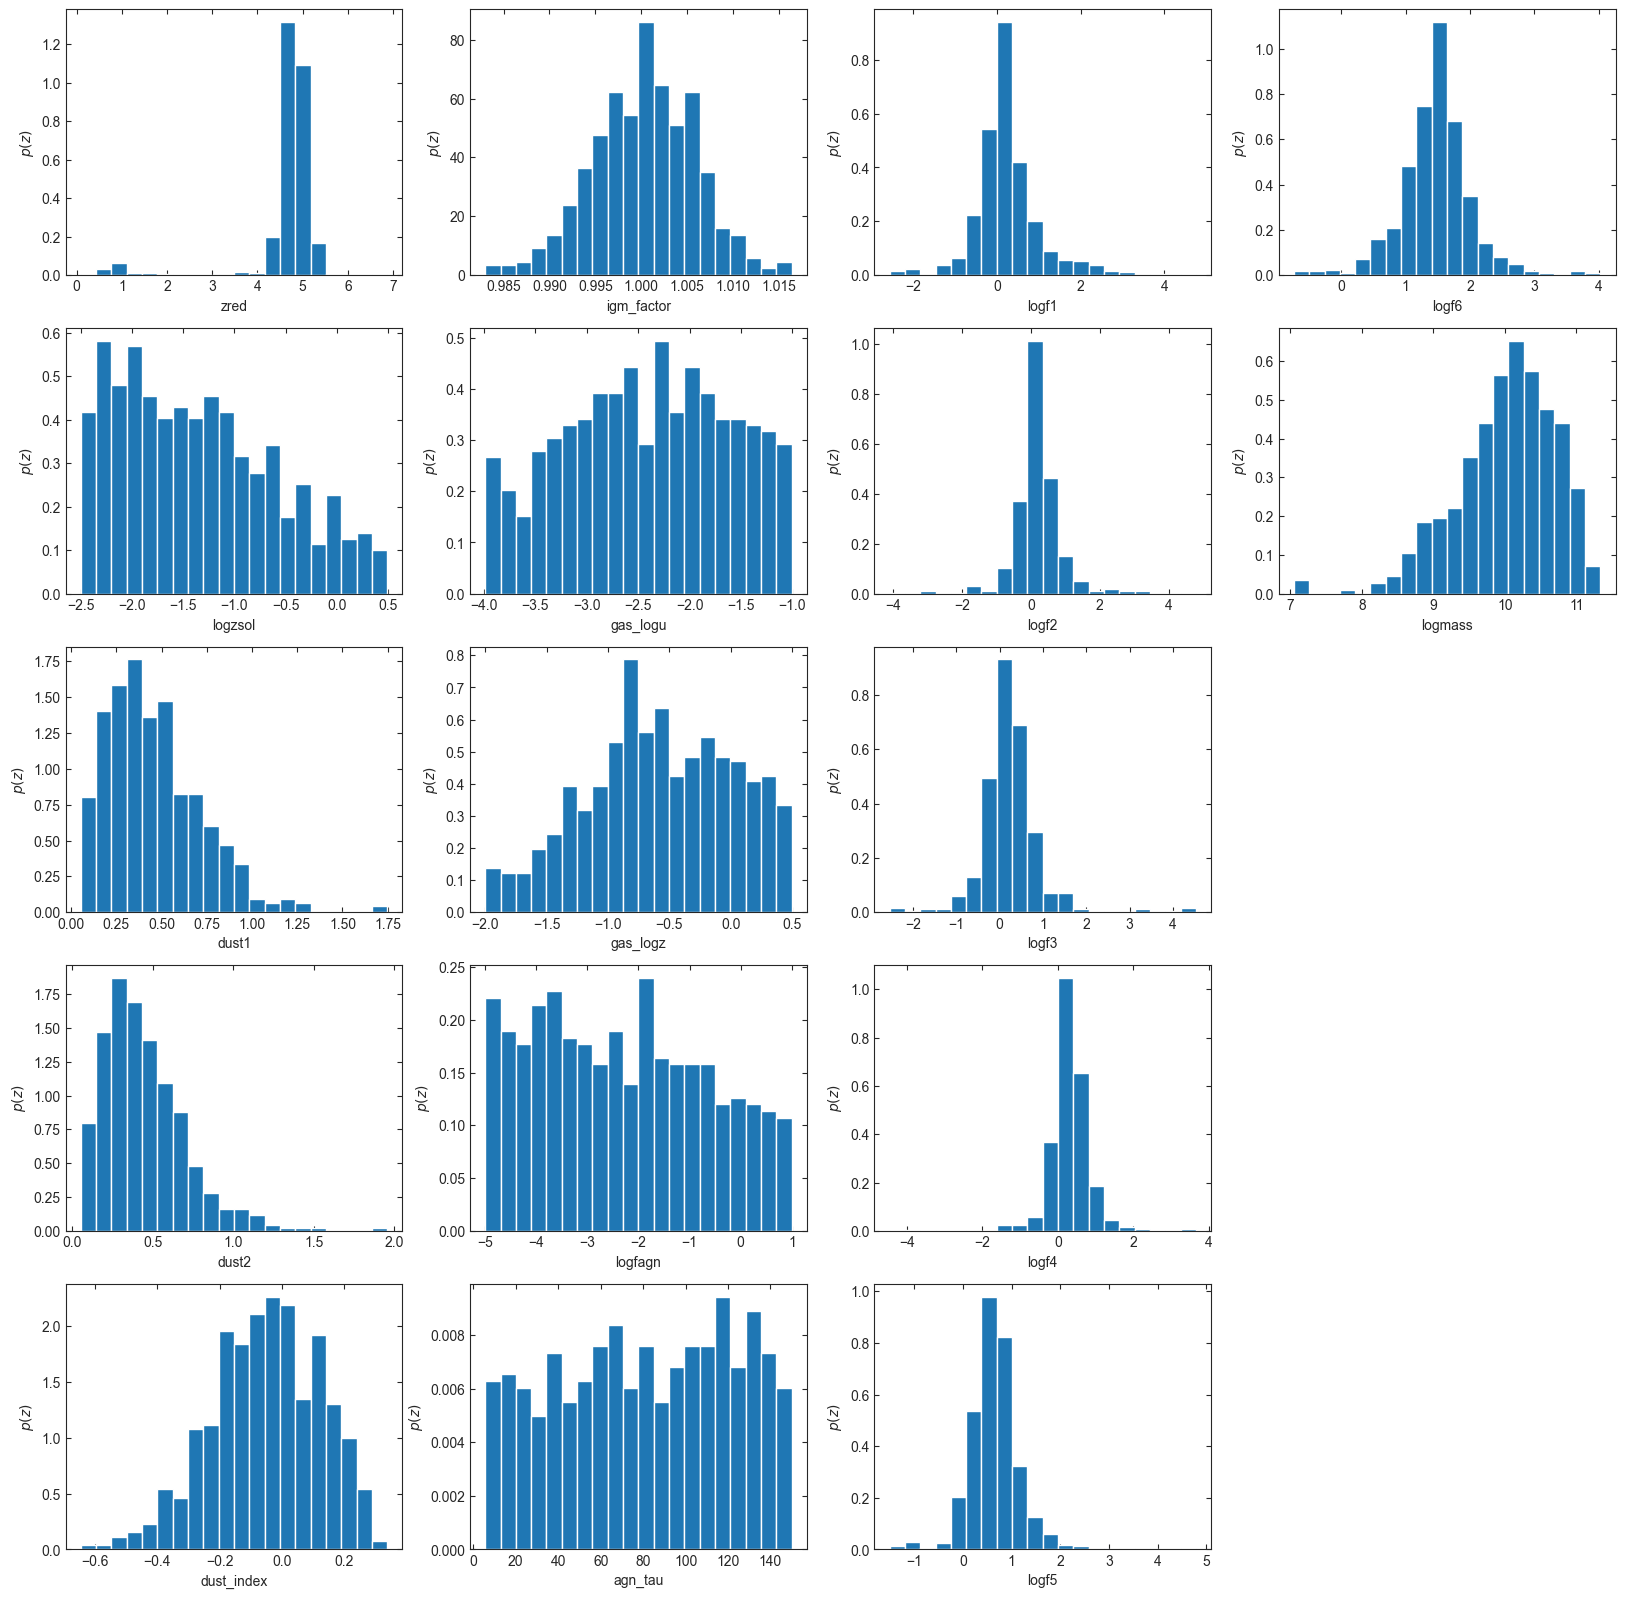

In [ ]:
indx=np.random.randint(0, nzs.shape[0])
pop.plot_galaxy_population(spsp[indx])
pop.plot_galaxy_population(np.squeeze(selected_spsp[indx, 0]))
pop.plot_galaxy_population(np.squeeze(selected_spsp[indx, 1]))
pop.plot_galaxy_population(np.squeeze(selected_spsp[indx, 2]))

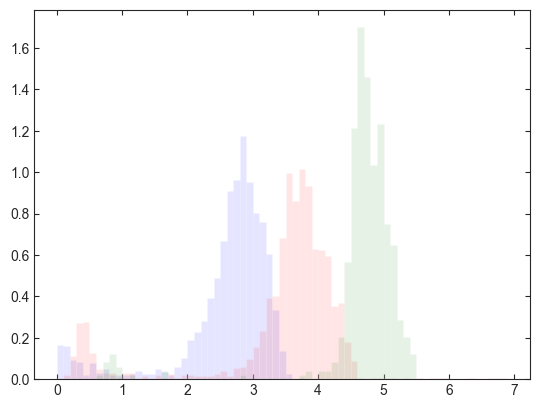

In [8]:
indx=np.random.randint(0, nzs.shape[0])
hist = plt.hist(nzs[indx][0], density=True, bins=bins, alpha = 0.1, color='blue')
hist = plt.hist(nzs[indx][1], density=True, bins=bins, alpha = 0.1, color='red')
hist = plt.hist(nzs[indx][2], density=True, bins=bins, alpha = 0.1, color='green')

In [14]:
#np.save("redshifts/emulated_redshifts_0.npy", nzs)

In [15]:
#np.save("nzs_test2.npy", nzs)
#np.save("spsp_test2.npy", spsp)